In [76]:
import pandas as pd
import numpy as np

grocery = pd.DataFrame({'category':['produce', 'produce', 'meat',
                                    'meat', 'meat', 'cheese', 'cheese'],
                        'item':['celery', 'apple', 'ham', 'turkey',  'lamb',
                                'cheddar', 'brie'],
                        'price':[.99, .49, 1.89, 4.34, 9.50, 6.25, 8.0]})

group_grocery=grocery.groupby('category')
one_mean = group_grocery.filter(lambda x: x.mean()>=3.00)

two_max = group_grocery.aggregate(np.max)

result=group_grocery.transform(lambda x: (x - 0.1*x) if np.max(x) > 3.00 else x)

three_round = result.loc[:,'price']

In [2]:
#Assignment
#Perform the following operations using split-apply-combine.

#Remove all items in categories where the mean price in that category is less than $3.00.
#Find the maximum values in each category for all features. (What does Pandas take to be the maximum value of the 'item' column?)
#If the maximum price in a category is more than $3.00, 
#reduce all prices in that category by 10%. Return a Series of the new price column.

import pandas as pd
import numpy as np

grocery = pd.DataFrame({'category':['produce', 'produce', 'meat',
                                    'meat', 'meat', 'cheese', 'cheese'],
                        'item':['celery', 'apple', 'ham', 'turkey',  'lamb',
                                'cheddar', 'brie'],
                        'price':[.99, .49, 1.89, 4.34, 9.50, 6.25, 8.0]})

group_grocery=grocery.groupby('category')
one_mean = group_grocery.filter(lambda x: x.mean()>=3.00)
two_mean= group_grocery.aggregate(np.max)

#temp=group_grocery.filter(lambda x: x.max()>=0)
#three_mean=group_grocery.apply(lambda x: (x - 0.1*x) if np.max(x) > 3.00 else x)
#one_mean= pd.merge(grocery,)
#print(one_mean)
#three_mean
#two_mean
grocery

,category,item,price
0,produce,celery,0.99
1,produce,apple,0.49
2,meat,ham,1.89
3,meat,turkey,4.34
4,meat,lamb,9.50
5,cheese,cheddar,6.25
6,cheese,brie,8.00


In [3]:
grocery.groupby('category').transform(lambda x: x * .9 if x.max() > 3 else x)

,price
0,0.990
1,0.490
2,1.701
3,3.906
4,8.550
5,5.625
6,7.200


In [8]:
result=group_grocery.transform(lambda x: (x - 0.1*x) if np.max(x) > 3.00 else x)
print(result.loc[:,'price'])

0    0.990
1    0.490
2    1.701
3    3.906
4    8.550
5    5.625
6    7.200
Name: price, dtype: float64


In [18]:
#Select all information from produce for pear and jackfruit
#Create a clearance_price column in produce which includes prices reduced 
#from the original prices by 50%. Then set two_clearance equal the entire row at index 3.

import pandas as pd

prices = pd.Series([1,1,2,3,5],
              index=['apple', 'pear', 'banana', 'mango', 'jackfruit'])

inventory = pd.Series([10, 50, 41, 22],
              index=['pear', 'banana', 'mango', 'apple'])

discount_prices = prices.apply(lambda x: .9*x if x>3 else x)

produce = pd.DataFrame({'price':prices,
                        'discount_price':discount_prices,
                        'inventory':inventory})

one_select = produce.loc[['pear','jackfruit'],:]

produce['clearance_price']= produce.loc[:,'price']*0.5

print(produce)

two_clearance = produce.iloc[2,:]
two_clearance



           price  discount_price  inventory  clearance_price
apple          1             1.0       22.0              0.5
banana         2             2.0       50.0              1.0
jackfruit      5             4.5        NaN              2.5
mango          3             3.0       41.0              1.5
pear           1             1.0       10.0              0.5


price              5.0
discount_price     4.5
inventory          NaN
clearance_price    2.5
Name: jackfruit, dtype: float64

In [9]:
#Fill in the Pandas code below to create a new DataFrame,
#customer_spend, that contains the following columns in this 
#order: customer_id, name, and total_spend. total_spend is a new column containing the sum 
#of the cost of all the orders that a particular customer placed. Note that this is likely to take a few steps!

import pandas as pd
import numpy as np

customers = pd.DataFrame([[100, 'Prometheus Barwis', 'prometheus.barwis@me.com',
        '(533) 072-2779'],[101, 'Alain Hennesey', 'alain.hennesey@facebook.com',
        '(942) 208-8460'],[102, 'Chao Peachy', 'chao.peachy@me.com',
        '(510) 121-0098'],[103, 'Somtochukwu Mouritsen',
        'somtochukwu.mouritsen@me.com','(669) 504-8080'],[104,
        'Elisabeth Berry', 'elisabeth.berry@facebook.com','(802) 973-8267']],
        columns = ['customer_id', 'name', 'email', 'phone'])

orders = pd.DataFrame([[1000, 100, 144.82], [1001, 100, 140.93],
       [1002, 102, 104.26], [1003, 100, 194.6 ], [1004, 100, 307.72],
       [1005, 101,  36.69], [1006, 104,  39.59], [1007, 104, 430.94],
       [1008, 103,  31.4 ], [1009, 104, 180.69], [1010, 102, 383.35],
       [1011, 101, 256.2 ], [1012, 103, 930.56], [1013, 100, 423.77],
       [1014, 101, 309.53], [1015, 102, 299.19]],
       columns = ['order_id', 'customer_id', 'order_total'])

In [10]:
customers

,customer_id,name,email,phone
0,100,Prometheus Barwis,prometheus.barwis@me.com,(533) 072-2779
1,101,Alain Hennesey,alain.hennesey@facebook.com,(942) 208-8460
2,102,Chao Peachy,chao.peachy@me.com,(510) 121-0098
3,103,Somtochukwu Mouritsen,somtochukwu.mouritsen@me.com,(669) 504-8080
4,104,Elisabeth Berry,elisabeth.berry@facebook.com,(802) 973-8267


In [11]:
orders

,order_id,customer_id,order_total
0,1000,100,144.82
1,1001,100,140.93
2,1002,102,104.26
3,1003,100,194.60
4,1004,100,307.72
5,1005,101,36.69
6,1006,104,39.59
7,1007,104,430.94
8,1008,103,31.40
9,1009,104,180.69


In [12]:
#Fill in the Pandas code below to create a new DataFrame,
#customer_spend, that contains the following columns in this 
#order: customer_id, name, and total_spend. total_spend is a new column containing the sum 
#of the cost of all the orders that a particular customer placed. Note that this is likely to take a few steps!

merge_customer_order = pd.merge(customers,orders,how='inner',on='customer_id')


,customer_id,name,email,phone,order_id,order_total
0,100,Prometheus Barwis,prometheus.barwis@me.com,(533) 072-2779,1000,144.82
1,100,Prometheus Barwis,prometheus.barwis@me.com,(533) 072-2779,1001,140.93
2,100,Prometheus Barwis,prometheus.barwis@me.com,(533) 072-2779,1003,194.60
3,100,Prometheus Barwis,prometheus.barwis@me.com,(533) 072-2779,1004,307.72
4,100,Prometheus Barwis,prometheus.barwis@me.com,(533) 072-2779,1013,423.77
5,101,Alain Hennesey,alain.hennesey@facebook.com,(942) 208-8460,1005,36.69
6,101,Alain Hennesey,alain.hennesey@facebook.com,(942) 208-8460,1011,256.20
7,101,Alain Hennesey,alain.hennesey@facebook.com,(942) 208-8460,1014,309.53
8,102,Chao Peachy,chao.peachy@me.com,(510) 121-0098,1002,104.26
9,102,Chao Peachy,chao.peachy@me.com,(510) 121-0098,1010,383.35


In [98]:
import numpy as np
agg_result_groupby=merge_customer_order.groupby(['customer_id','name'])["order_total"].sum()
customer_spend=agg_result_groupby.reset_index(level=None,col_level=0,col_fill='order_total')
customer_spend

TypeError: reset_index() got an unexpected keyword argument 'col_level'

In [112]:

# Learn will check the contents/column names of the customer_spend object.
merge_customer_order = pd.merge(customers,orders,how='inner',on='customer_id')
agg_result_groupby=merge_customer_order.groupby(['customer_id','name'])["order_total"].sum()
#agg_result_groupby.reset_index()
#agg_result_groupby1=merge_customer_order.groupby(['customer_id','name'])["order_total1"].sum()
customer_spend=agg_result_groupby.reset_index()

customer_spend=customer_spend.rename(columns={'order_total':'total_spend'})


In [113]:
customer_spend


,customer_id,name,total_spend
0,100,Prometheus Barwis,1211.84
1,101,Alain Hennesey,602.42
2,102,Chao Peachy,786.80
3,103,Somtochukwu Mouritsen,961.96
4,104,Elisabeth Berry,651.22


In [146]:
def df_histogram(df, colname, num_bins = 10):
  """
  Given a Pandas DataFrame, df, return a histogram plotting object for the
  data in the column, specified by colname. Optionally specify the number
  of bins in the histogram with num_bins.

  Parameters
  ----------
  df: (Pandas DataFrame).
  colname: (str) name of column in df to be plotted.
  num_bins: (int) number of bins to include in the histogram plot.

  Returns
  -------
  (Pandas/Matplotlib plot object)
  """
  target_df=df.plot(y = colname, kind = 'hist',bins=num_bins)
  return target_df

In [121]:
import matplotlib.pyplot as plt
%matplotlib inline


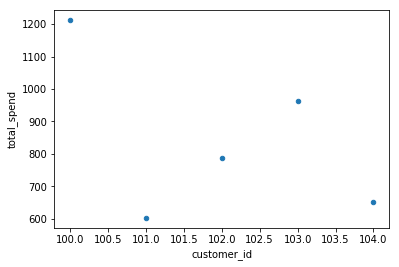

In [126]:
customer_spend.plot(x = 'customer_id', y = 'total_spend', kind = 'scatter')

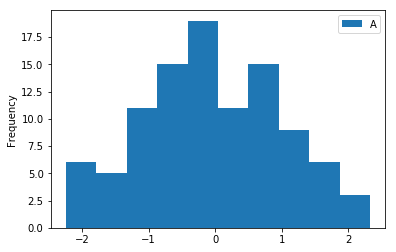

In [137]:
df = pd.DataFrame(np.random.randn(100, 2), columns=['A','B'])
df.plot(y = 'A', kind = 'hist',bins=10)

In [ ]:
df_histogram(df,'B',1)

In [181]:
import numpy as np
def replace_missing(df, replace_method = 'mean'):
  """
  Given a DataFrame, df, any fields that are null (represented in Pandas
  with NaN) will be replaced using the method specified in replace_method.

  Parameters
  ----------
  df: (Pandas DataFrame).

  replace_method: (variable type) 'mean', 'median', 0, -1, 9999999, etc.
      If 'mean'/'median': replace each missing value with the mean/median
                          value of its column.
      If other: any other value will be taken to be a replacement *value*
                and inserted for the missing values.

  Returns
  -------
  df: (Pandas DataFrame)
  """
  if replace_method=='mean':
        return df.replace(np.nan,df.mean())
    
  if replace_method=='median':
        return df.replace(np.nan,df.median())
  
  return df.replace(np.nan,replace_method)

In [148]:
 df = pd.DataFrame({'a':[0,10,None,30], 'b':[None,100,1000,10000], 'c':[1,2,3,4]})

In [149]:
df

,a,b,c
0,0.0,NaN,1
1,10.0,100.0,2
2,NaN,1000.0,3
3,30.0,10000.0,4


In [180]:
replace_missing(df,'median')

,a,b,c
0,0.0,1000.0,1
1,10.0,100.0,2
2,10.0,1000.0,3
3,30.0,10000.0,4
